In [248]:
import networkx as nx
import itertools
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import random

In [ ]:
# G = nx.barabasi_albert_graph(50,m=2,seed=4)
G = nx.random_regular_graph(3,10,seed=14)
# G = nx.watts_strogatz_graph(50, 5, 0.5)
for u, v in G.edges:
    G[u][v]['weight'] = int(random.randint(3,10))

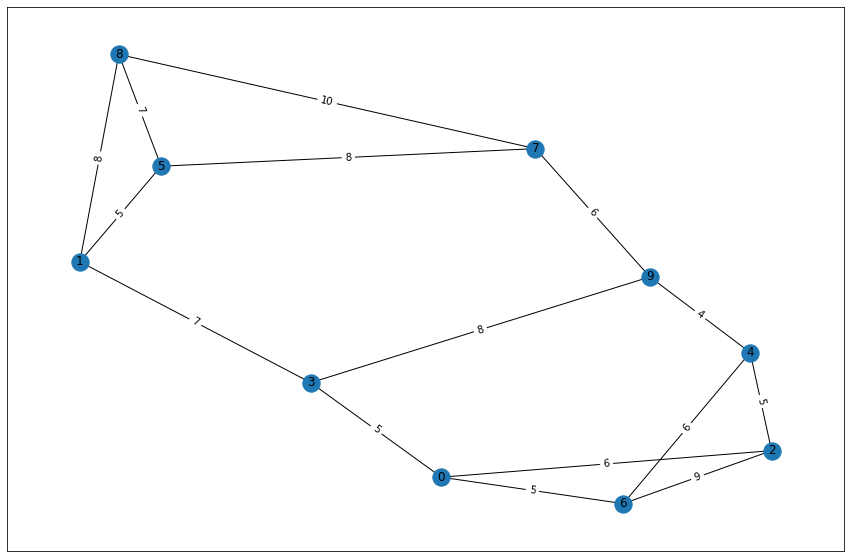

In [433]:


weight = nx.get_edge_attributes(G, "weight")
# nx.draw(G)

plt.figure(figsize=(15,10))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)
plt.show()

In [426]:
sp=dict(nx.all_pairs_dijkstra_path_length(G))
sp

{2: {2: 0, 0: 6, 6: 9, 4: 10, 3: 11, 9: 15, 1: 15, 5: 18, 8: 18, 7: 22},
 4: {4: 0, 6: 8, 9: 9, 2: 10, 0: 11, 3: 13, 1: 17, 7: 19, 5: 20, 8: 20},
 1: {1: 0, 5: 3, 8: 3, 3: 4, 7: 7, 9: 8, 0: 9, 6: 12, 2: 15, 4: 17},
 5: {5: 0, 1: 3, 8: 3, 7: 4, 3: 7, 9: 11, 0: 12, 6: 15, 2: 18, 4: 20},
 9: {9: 0, 3: 4, 1: 8, 4: 9, 0: 9, 7: 10, 5: 11, 8: 11, 6: 12, 2: 15},
 8: {8: 0, 5: 3, 1: 3, 7: 6, 3: 7, 9: 11, 0: 12, 6: 15, 2: 18, 4: 20},
 0: {0: 0, 6: 3, 3: 5, 2: 6, 9: 9, 1: 9, 4: 11, 5: 12, 8: 12, 7: 16},
 3: {3: 0, 9: 4, 1: 4, 0: 5, 5: 7, 8: 7, 6: 8, 2: 11, 7: 11, 4: 13},
 6: {6: 0, 0: 3, 4: 8, 3: 8, 2: 9, 9: 12, 1: 12, 5: 15, 8: 15, 7: 19},
 7: {7: 0, 5: 4, 8: 6, 1: 7, 9: 10, 3: 11, 0: 16, 4: 19, 6: 19, 2: 22}}

In [427]:
dict_ecc = nx.eccentricity(G, sp=sp)
dict_ecc

{2: 22, 4: 20, 1: 17, 5: 20, 9: 15, 8: 20, 0: 16, 3: 13, 6: 19, 7: 22}

Расстояние между перефирийными вершинами

In [428]:
diametr = nx.diameter(G, e=dict_ecc)
diametr

22

Найдем перифирийные вершины, их расстояние будет равно диаметру графа,
обязательно передаем в параметр е - словарь эксцентриситетов, иначе он будет считать не по
весам, а по ребрам

In [349]:
# for v in nx.eccentricity(G):
#     if nx.eccentricity(G)[v] == diametr_of_graph:
#         print(v)

9
39
2
41
25
28
22
44
47
31
6
12


In [351]:
nx.periphery(G, e=dict_ecc)

[9, 39, 2, 41, 25, 28, 22, 44, 47, 31, 6, 12]

In [372]:
nx.shortest_path_length(G, source=6, target=18)

6

Найдем расстояние между перифирийными вершиными

In [338]:
nx.eccentricity(G)

{9: 7,
 39: 7,
 32: 6,
 37: 6,
 8: 6,
 49: 6,
 15: 6,
 24: 6,
 46: 6,
 2: 7,
 29: 6,
 35: 6,
 16: 6,
 41: 7,
 3: 6,
 25: 7,
 20: 6,
 23: 6,
 5: 6,
 28: 7,
 22: 7,
 44: 7,
 17: 6,
 30: 6,
 26: 6,
 11: 6,
 13: 6,
 14: 5,
 34: 6,
 43: 6,
 33: 6,
 19: 6,
 27: 6,
 47: 7,
 38: 6,
 31: 7,
 48: 6,
 1: 6,
 42: 6,
 0: 6,
 18: 6,
 21: 6,
 4: 6,
 6: 7,
 40: 6,
 10: 6,
 36: 6,
 12: 7,
 45: 6,
 7: 6}

In [311]:
G.edges

EdgeView([(6, 18), (6, 20), (6, 41), (18, 28), (18, 15), (24, 27), (24, 12), (24, 3), (27, 34), (27, 33), (10, 40), (10, 0), (10, 13), (40, 9), (40, 33), (8, 49), (8, 42), (8, 1), (49, 47), (49, 14), (0, 45), (0, 4), (45, 35), (45, 36), (7, 26), (7, 43), (7, 46), (26, 20), (26, 44), (16, 35), (16, 15), (16, 33), (35, 46), (20, 34), (29, 38), (29, 2), (29, 39), (38, 22), (38, 37), (46, 48), (48, 41), (48, 31), (14, 19), (14, 31), (19, 21), (19, 44), (23, 25), (23, 28), (23, 30), (25, 28), (25, 36), (39, 42), (39, 30), (42, 17), (34, 37), (37, 47), (9, 11), (9, 32), (11, 3), (11, 15), (31, 5), (21, 12), (21, 13), (22, 44), (22, 36), (12, 43), (43, 5), (5, 41), (13, 17), (17, 4), (47, 1), (32, 30), (32, 3), (2, 4), (2, 1)])

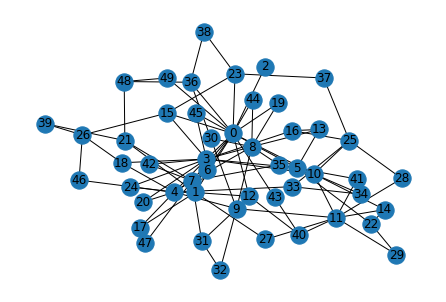

In [177]:
#nx.draw_spring(G, with_labels=True)

In [373]:
nx.get_edge_attributes(G, 'weight')


{(9, 39): 7,
 (9, 26): 5,
 (9, 47): 8,
 (39, 2): 7,
 (39, 40): 7,
 (32, 37): 3,
 (32, 46): 10,
 (32, 13): 8,
 (37, 23): 8,
 (37, 16): 10,
 (8, 49): 3,
 (8, 33): 3,
 (8, 48): 9,
 (49, 40): 6,
 (49, 48): 10,
 (15, 24): 5,
 (15, 26): 8,
 (15, 18): 10,
 (24, 21): 8,
 (24, 34): 4,
 (46, 29): 4,
 (46, 4): 5,
 (2, 20): 4,
 (2, 31): 3,
 (29, 35): 10,
 (29, 27): 8,
 (35, 20): 9,
 (35, 10): 3,
 (16, 41): 8,
 (16, 43): 5,
 (41, 20): 8,
 (41, 12): 5,
 (3, 25): 8,
 (3, 43): 3,
 (3, 30): 5,
 (25, 31): 10,
 (25, 18): 10,
 (23, 11): 6,
 (23, 10): 6,
 (5, 28): 5,
 (5, 34): 4,
 (5, 17): 5,
 (28, 22): 3,
 (28, 6): 8,
 (22, 44): 8,
 (22, 6): 8,
 (44, 0): 9,
 (44, 6): 10,
 (17, 30): 3,
 (17, 14): 4,
 (30, 7): 7,
 (26, 38): 6,
 (11, 4): 5,
 (11, 21): 7,
 (13, 14): 7,
 (13, 19): 4,
 (14, 36): 7,
 (34, 27): 3,
 (43, 33): 7,
 (33, 38): 10,
 (19, 27): 9,
 (19, 40): 5,
 (47, 12): 3,
 (47, 45): 9,
 (38, 42): 10,
 (31, 4): 4,
 (48, 1): 10,
 (1, 42): 6,
 (1, 0): 5,
 (42, 7): 8,
 (0, 10): 5,
 (18, 21): 5,
 (36, 45):

In [480]:
copy_G = G.copy()

In [481]:
T = nx.minimum_spanning_tree(copy_G)

In [482]:
edge_T = T.edges

In [483]:
edge_T

EdgeView([(2, 4), (2, 0), (4, 9), (1, 5), (1, 3), (5, 8), (9, 7), (0, 3), (0, 6)])

In [484]:
for u, v in edge_T:
    print(u, v)
    copy_G[u][v]['color'] = 'r'

2 4
2 0
4 9
1 5
1 3
5 8
9 7
0 3
0 6


In [488]:
color_map = []
for edge in G.edges:
    if edge in edge_T:
        color_map.append('blue')
    else: 
        color_map.append('grey')      

In [489]:
color_map

['blue',
 'blue',
 'grey',
 'blue',
 'grey',
 'blue',
 'grey',
 'blue',
 'blue',
 'grey',
 'blue',
 'grey',
 'grey',
 'blue',
 'blue']

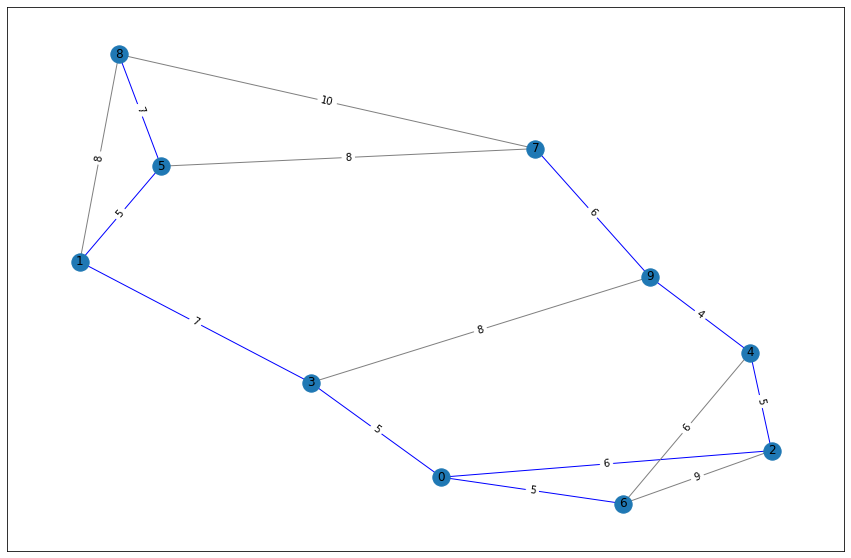

In [490]:
plt.figure(figsize=(15,10))
pos = nx.kamada_kawai_layout(copy_G)
nx.draw_networkx(copy_G, pos=pos, with_labels=True, edge_color=color_map)
nx.draw_networkx_edge_labels(copy_G, pos, edge_labels=weight)
plt.show()

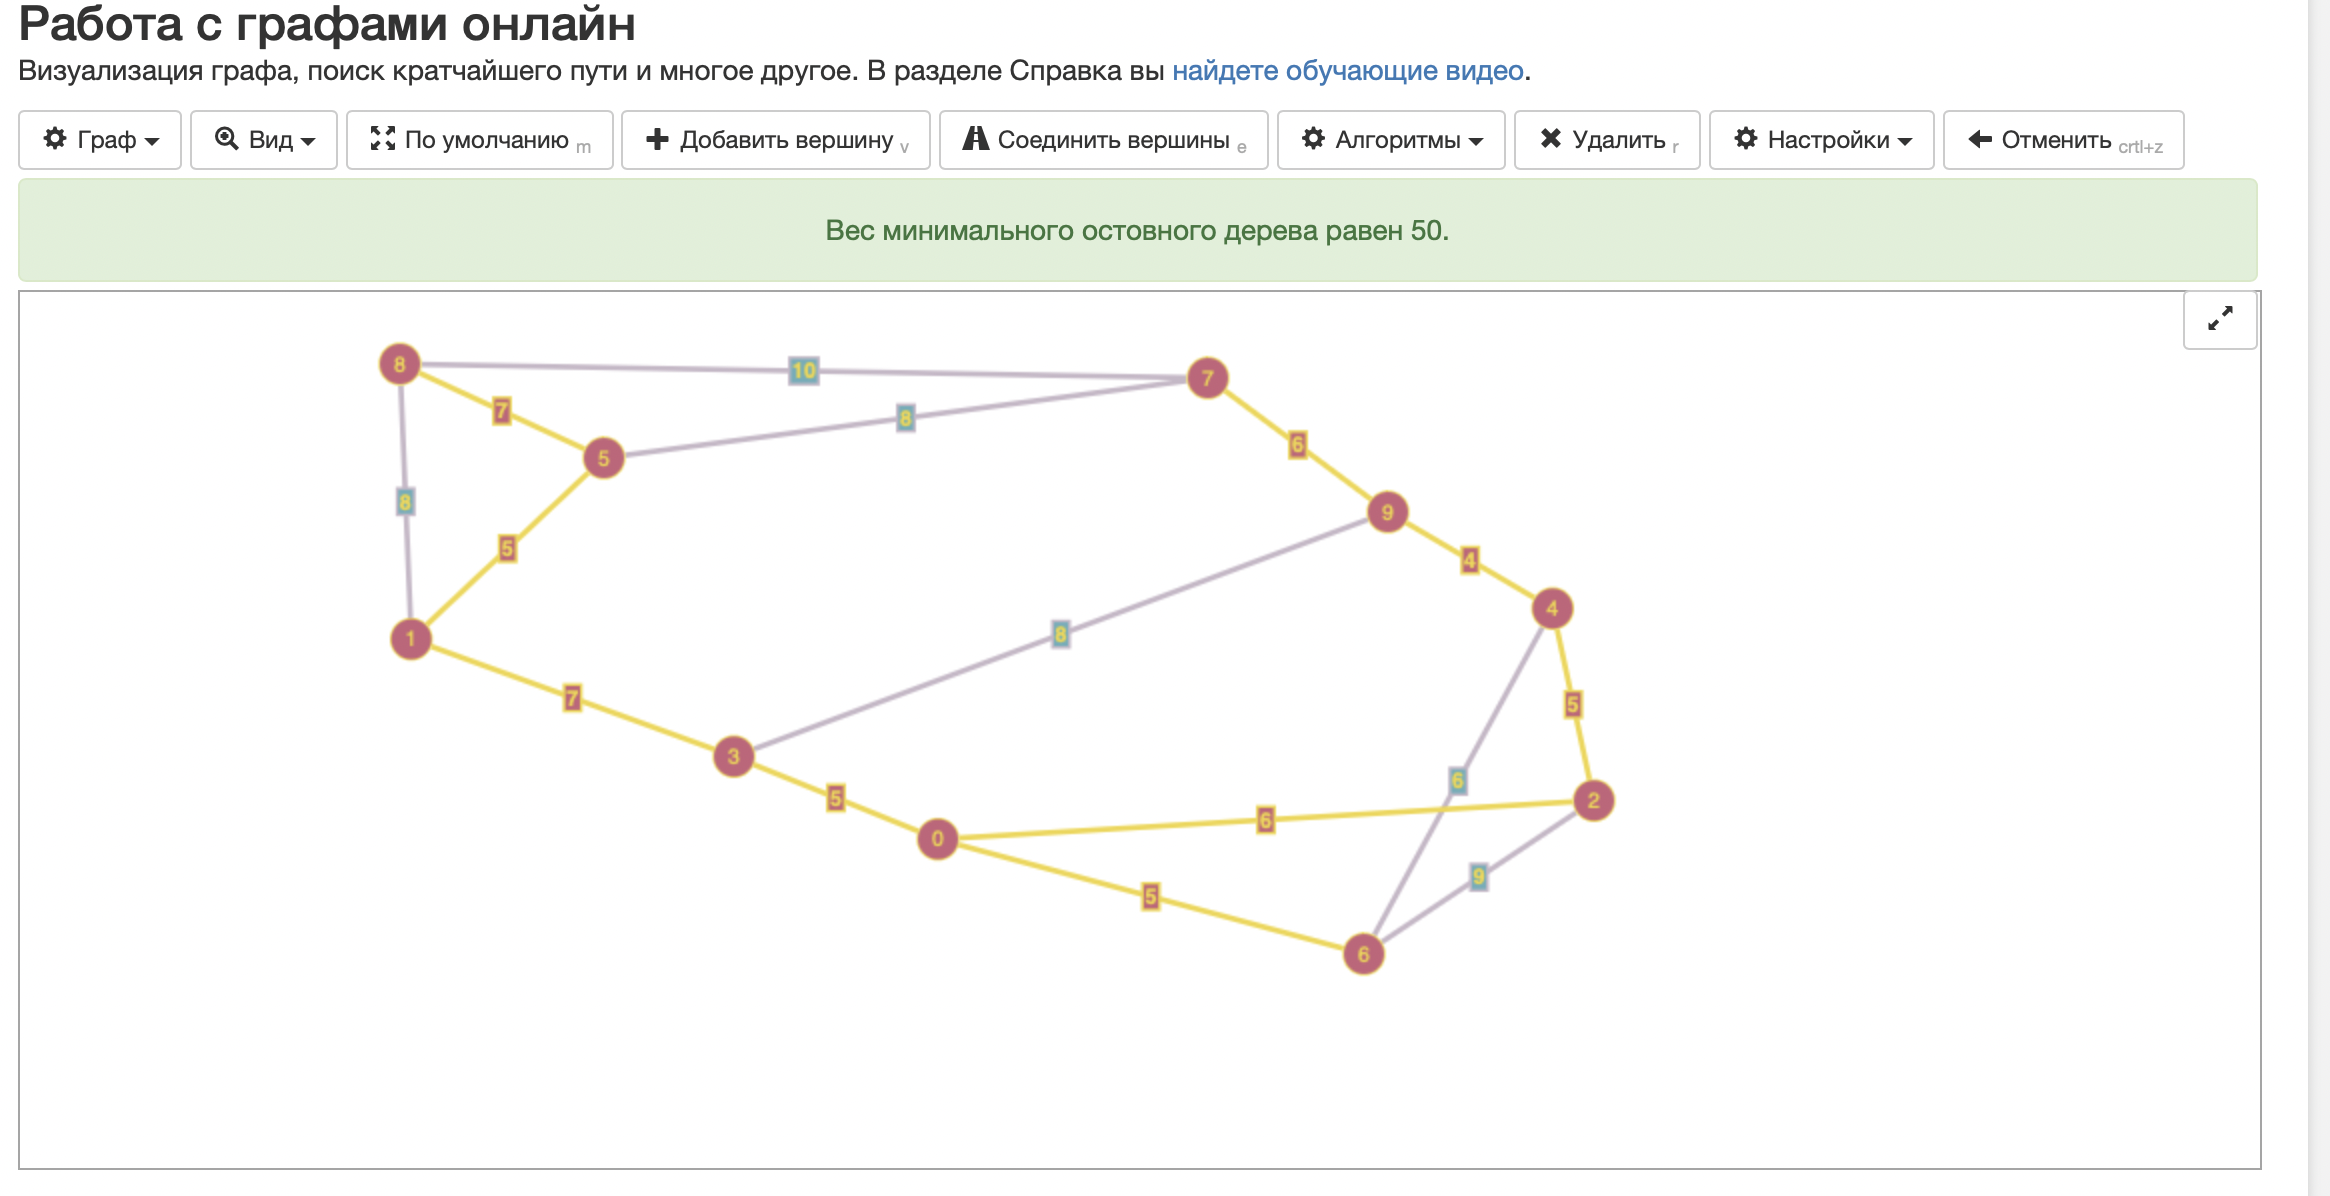